<a href="https://colab.research.google.com/github/MaxBusha/CS-5324/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below are some installs that are used to make sure we can get the kaggle data, we also included some that should be there for redundancy

In [8]:
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install pillow

This code cell includes the first two imports and the download of the kaggle dataset


In [9]:
# fetch the images for the dataset
# this will take a long time the first run because it needs to download
# after the first time, the dataset will be saved to your disk (in sklearn package somewhere)
# if this does not run, you may need additional libraries installed on your system (install at your own risk!!)
from sklearn.datasets import fetch_lfw_people


In [10]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maxbusha07
Your Kaggle Key: ··········


100%|██████████| 534M/534M [00:14<00:00, 38.3MB/s]


This code block is used to import the rest of the libraries that will be used in the project

In [11]:
import os, sys
from os import listdir
from IPython.display import display
from IPython.display import Image as _Imgdis
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from numpy import asarray

In [30]:
folder = "vegetable-image-dataset/Vegetable Images/test/Bean"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]


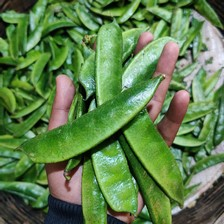

(224, 224, 3)


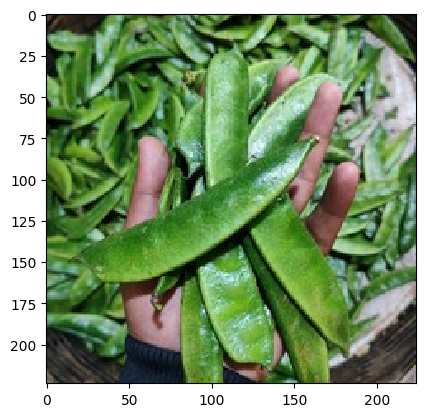

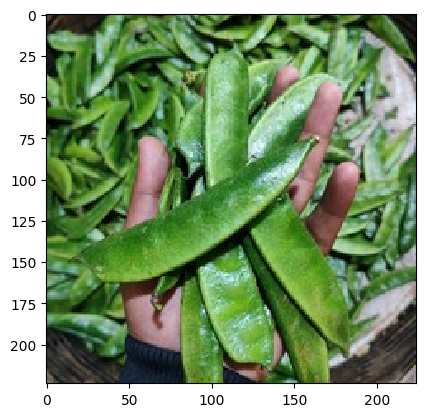

In [52]:
image = Image.open("vegetable-image-dataset/Vegetable Images/test/Bean/0001.jpg")
display(image)
img1array = asarray(image)
print(img1array.shape)
plt.imshow(img1array, interpolation='nearest')
plt.show()
img1flat = img1array.flatten()
img1flat = img1flat.reshape(224, 224, 3)
plt.imshow(img1flat, interpolation='nearest')

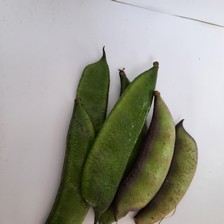

(224, 224, 3)


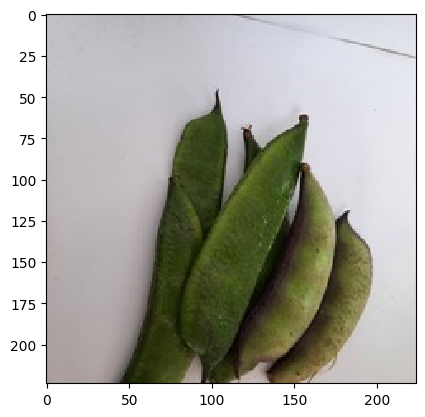

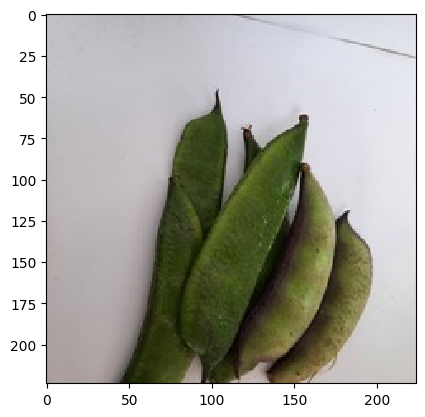

In [31]:
img1 = Image.open("vegetable-image-dataset/Vegetable Images/test/Bean/0114.jpg")
display(img1)
img1array = asarray(img1)
print(img1array.shape)
plt.imshow(img1array, interpolation='nearest')
plt.show()
img1flat = img1array.flatten()
img1flat = img1flat.reshape(224, 224, 3)
plt.imshow(img1flat, interpolation='nearest')

In [36]:

# filling list with 1d image arrays
image_array_list = []
for i in range(0, len(onlyfiles)):
  img = Image.open(folder + "/" + onlyfiles[i])
  image_array = asarray(img)
  flattened_image = image_array.flatten()
  image_array_list.append(flattened_image)

# # this shows that the list is full of 1d arrays of images
# for img in image_array_list:
#   print(img.shape)

# # prints out all of the images in the specified folder
# print("Working with {0} images".format(len(onlyfiles)))
# print("Image examples: ")
# for i in range(0, len(onlyfiles)):
#     print(onlyfiles[i])
#     display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

# # prints out one image from folder
# display(_Imgdis(filename=folder + "/" + onlyfiles[0], width=240, height=320))

# # example of pulling and flattening one image
# img = Image.open(folder + "/" + onlyfiles[0])
# numpydata = asarray(img)
# print(numpydata.shape)
# numpydata_flat = numpydata.flatten()
# print(numpydata_flat.shape)

# # code if we end up making df hopefully not
# df = pd.DataFrame(np.hstack(image_array_list))

print(len(image_array_list))


200


In [12]:
import os
import cv2
import pandas as pd

# Path to the directory containing subfolders
data_dir = "vegetable-image-dataset/Vegetable Images/test"

# Initialize lists to store image data and labels
image_data = []
labels = []

# Iterate through each subfolder in the directory
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        # Iterate through each image file in the subfolder
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            # Read the image
            image = Image.open(image_path)

            img1array = asarray(image)
            img1flat = img1array.flatten()

            # Append the image data and label to lists
            image_data.append(img1flat)
            labels.append(label)

# Create a DataFrame using Pandas
df = pd.DataFrame({'Image Data': image_data, 'Label': labels})

# Display the DataFrame
print(df)

                                             Image Data         Label
0     [152, 142, 130, 150, 140, 128, 156, 148, 135, ...  Bottle_Gourd
1     [157, 154, 149, 157, 154, 149, 159, 154, 150, ...  Bottle_Gourd
2     [106, 89, 82, 106, 89, 81, 111, 94, 86, 114, 9...  Bottle_Gourd
3     [122, 121, 155, 124, 123, 154, 127, 125, 147, ...  Bottle_Gourd
4     [74, 50, 38, 70, 46, 34, 68, 44, 32, 69, 45, 3...  Bottle_Gourd
...                                                 ...           ...
2995  [28, 44, 18, 22, 35, 15, 0, 6, 0, 0, 2, 0, 0, ...      Capsicum
2996  [98, 92, 76, 88, 82, 66, 93, 87, 71, 102, 96, ...      Capsicum
2997  [226, 174, 98, 219, 167, 94, 214, 163, 97, 219...      Capsicum
2998  [0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, ...      Capsicum
2999  [194, 118, 120, 186, 112, 113, 169, 98, 96, 14...      Capsicum

[3000 rows x 2 columns]


In [36]:
df.shape
df.Label.unique()

array(['Bottle_Gourd', 'Bean', 'Papaya', 'Carrot', 'Tomato', 'Cabbage',
       'Potato', 'Cauliflower', 'Cucumber', 'Broccoli', 'Pumpkin',
       'Radish', 'Bitter_Gourd', 'Brinjal', 'Capsicum'], dtype=object)

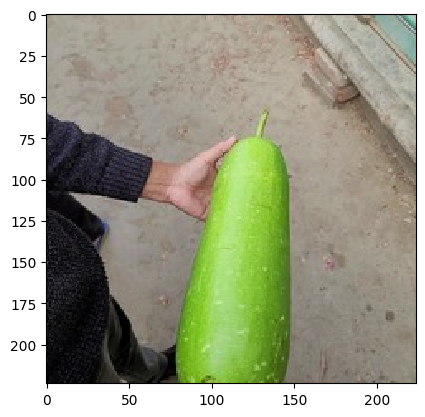

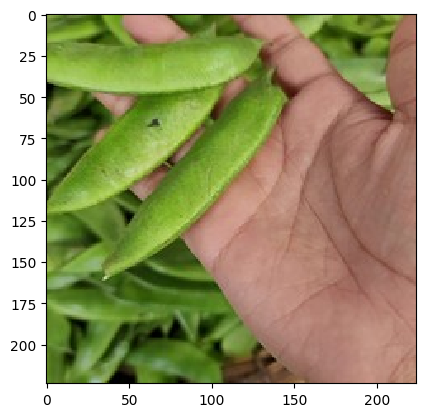

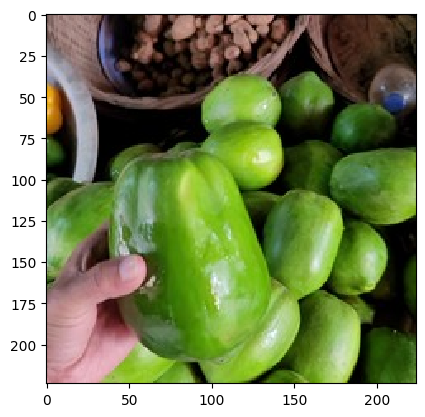

In [41]:
from matplotlib.pyplot import imshow, show
# filtered_df = df[df['Label'] == desired_label]

unique_labels = df['Label'].unique()
unique_labels = unique_labels[:3]

for labels in unique_labels:
  first_entry_for_label = df[df['Label'] == labels].iloc[0]

  img = first_entry_for_label['Image Data']

  img = img.reshape(224, 224, 3)
  plt.imshow(img, interpolation='nearest')
  show()
